#**Predicción de Precios de Autos Usados con Regresión Lineal**
###Melissa Gómez Rentería
En este ejercicio, utilizaremos un dataset de precios de autos usados para entrenar un modelo de Regresión Lineal Simple. El objetivo es predecir el precio de un auto en función de una variable independiente, como el año del vehículo o el kilometraje.

##*Descripción del Dataset*
Este dataset contiene información sobre distintos modelos de autos, sus características y su precio de venta. Se utilizará para analizar cómo ciertos factores influyen en el valor de un auto y para entrenar un modelo de regresión lineal.

##*Variables del Dataset*
- Brand:	Marca del auto
- Model:	Modelo específico del auto
- Year:	Año de fabricación del auto. Autos más recientes tienden a ser más caros.
- Engine_Size:	Tamaño del motor en litros (ej. 1.6L, 2.0L). Puede influir en el precio.
- Fuel_Type:	Tipo de combustible del auto (Gasolina, Diesel, Híbrido, Eléctrico).
- Transmission:	Tipo de transmisión (Manual, Automática, CVT).
- Mileage:	Millaje recorrido por el auto. Normalmente, más millaje reduce el precio.
- Doors:	Número de puertas del auto (2, 4, 5, etc.).
- Owner_Count:	Número de dueños anteriores del auto. Un auto con más dueños puede valer menos.
- Price	Precio de venta del auto (variable objetivo). Se usará como la variable dependiente en la regresión.

#*Objetivo del Análisis*
El objetivo es entrenar un modelo de Regresión Lineal Simple utilizando una de las variables independientes (como Year o Mileage) para predecir el Price. Luego, evaluaremos el modelo con métricas como MAE, RMSE y R², y analizaremos si la regresión es adecuada.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data=pd.read_csv('car_price_dataset.csv')
print(f'data.shape: {data.shape}')
data.head()

data.shape: (10000, 10)


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [3]:
df=pd.DataFrame(data)
df

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


##Análisis exploratorio de datos

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB
None


In [9]:
df.isnull().sum().to_frame('NaN Value').T

,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Kia,Brand_Mercedes,Brand_Toyota,Brand_Volkswagen
NaN Value,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Year,10000.0,2011.54370,6.897699,2000.0,2006.00,2012.0,2017.0,2023.0
Engine_Size,10000.0,3.00056,1.149324,1.0,2.00,3.0,4.0,5.0
Mileage,10000.0,149239.11180,86322.348957,25.0,74649.25,149587.0,223577.5,299947.0
Doors,10000.0,3.49710,1.110097,2.0,3.00,3.0,4.0,5.0
Owner_Count,10000.0,2.99110,1.422682,1.0,2.00,3.0,4.0,5.0
Price,10000.0,8852.96440,3112.596810,2000.0,6646.00,8858.5,11086.5,18301.0


In [11]:
df.describe(include=[object]).T

,count,unique,top,freq
Model,10000,30,Accord,365
Fuel_Type,10000,4,Electric,2625
Transmission,10000,3,Manual,3372


Las columnas tengan datos de un tipo que no sea numérico, se cambiarán.
- El modelo no es algo que afecte en gran cantidad, por lo que se eliminará.
- El tipo de combustible y de transmisón puede cambiarse a forma numérica, para que con ello, sea mas sencilla su implementación

In [13]:
df.drop('Model', axis=1, inplace=True)
df

,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Kia,Brand_Mercedes,Brand_Toyota,Brand_Volkswagen
0,2020,4.2,Diesel,0,289944,3,5,8501,False,False,False,False,False,False,True,False,False,False
1,2012,2.0,Hybrid,1,5356,2,3,12092,False,False,True,False,False,False,False,False,False,False
2,2020,4.2,Diesel,1,231440,4,2,11171,False,False,False,False,False,False,False,True,False,False
3,2023,2.0,Electric,0,160971,2,1,11780,True,False,False,False,False,False,False,False,False,False
4,2003,2.6,Hybrid,2,286618,3,3,2867,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2004,3.7,Diesel,2,5794,2,4,8884,False,False,False,False,False,False,True,False,False,False
9996,2002,1.4,Electric,1,168000,2,1,6240,False,False,True,False,False,False,False,False,False,False
9997,2010,3.0,Petrol,1,86664,5,1,9866,False,True,False,False,False,False,False,False,False,False
9998,2002,1.4,Hybrid,1,225772,4,1,4084,False,False,False,True,False,False,False,False,False,False


In [14]:
df['Transmission']=df['Transmission'].replace(['Manual', 'Automatic', 'Semi-Automatic'], [0,1,2])
df['Fuel_Type']=df['Fuel_Type'].replace(['Diesel', 'Petrol', 'Electric', 'Hybrid'], [1,2,3,4])
df

<ipython-input-14-7ac10214bb42>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Fuel_Type']=df['Fuel_Type'].replace(['Diesel', 'Petrol', 'Electric', 'Hybrid'], [1,2,3,4])


,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Kia,Brand_Mercedes,Brand_Toyota,Brand_Volkswagen
0,2020,4.2,1,0,289944,3,5,8501,False,False,False,False,False,False,True,False,False,False
1,2012,2.0,4,1,5356,2,3,12092,False,False,True,False,False,False,False,False,False,False
2,2020,4.2,1,1,231440,4,2,11171,False,False,False,False,False,False,False,True,False,False
3,2023,2.0,3,0,160971,2,1,11780,True,False,False,False,False,False,False,False,False,False
4,2003,2.6,4,2,286618,3,3,2867,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2004,3.7,1,2,5794,2,4,8884,False,False,False,False,False,False,True,False,False,False
9996,2002,1.4,3,1,168000,2,1,6240,False,False,True,False,False,False,False,False,False,False
9997,2010,3.0,2,1,86664,5,1,9866,False,True,False,False,False,False,False,False,False,False
9998,2002,1.4,4,1,225772,4,1,4084,False,False,False,True,False,False,False,False,False,False


##Estadísticas descriptivas

In [16]:
print(df.describe())

               Year   Engine_Size     Fuel_Type  Transmission        Mileage  \
count  10000.000000  10000.000000  10000.000000  10000.000000   10000.000000   
mean    2011.543700      3.000560      2.501900      0.993900  149239.111800   
std        6.897699      1.149324      1.114953      0.817514   86322.348957   
min     2000.000000      1.000000      1.000000      0.000000      25.000000   
25%     2006.000000      2.000000      1.000000      0.000000   74649.250000   
50%     2012.000000      3.000000      3.000000      1.000000  149587.000000   
75%     2017.000000      4.000000      3.000000      2.000000  223577.500000   
max     2023.000000      5.000000      4.000000      2.000000  299947.000000   

              Doors   Owner_Count        Price  
count  10000.000000  10000.000000  10000.00000  
mean       3.497100      2.991100   8852.96440  
std        1.110097      1.422682   3112.59681  
min        2.000000      1.000000   2000.00000  
25%        3.000000      2.000000 

##Visualizacion de la distribución del precio de los autos

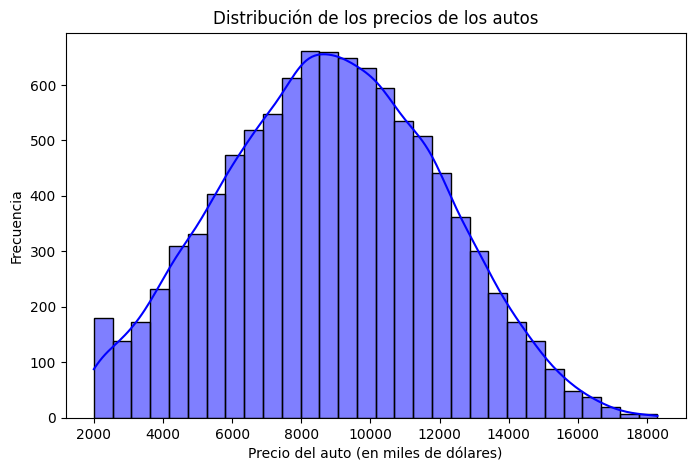

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Price"], bins=30, kde=True, color="blue")
plt.xlabel("Precio del auto (en miles de dólares)")
plt.ylabel("Frecuencia")
plt.title("Distribución de los precios de los autos")
plt.show()

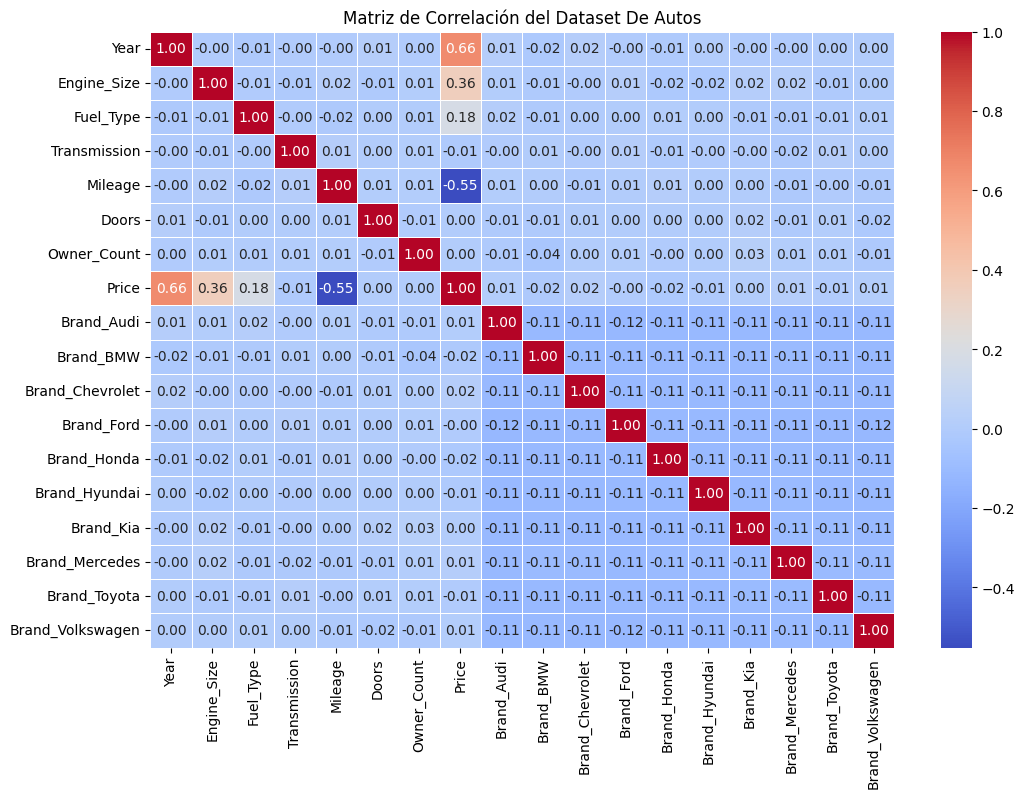

In [19]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación del Dataset De Autos")
plt.show()

- Year: El año del auto tiene una alta correlación POSITIVA con Price (0.66).
- Millage: El millaje tiene una alta correlación NEGATIVA con el Price (-0.55), lo que indica que entre mayor sea el millaje en los autos, menor será el precio.
- Se observa que Millage tiene una fuerte correlación negativa con Price, mientras que Year muestra una fuerte correlación positiva.

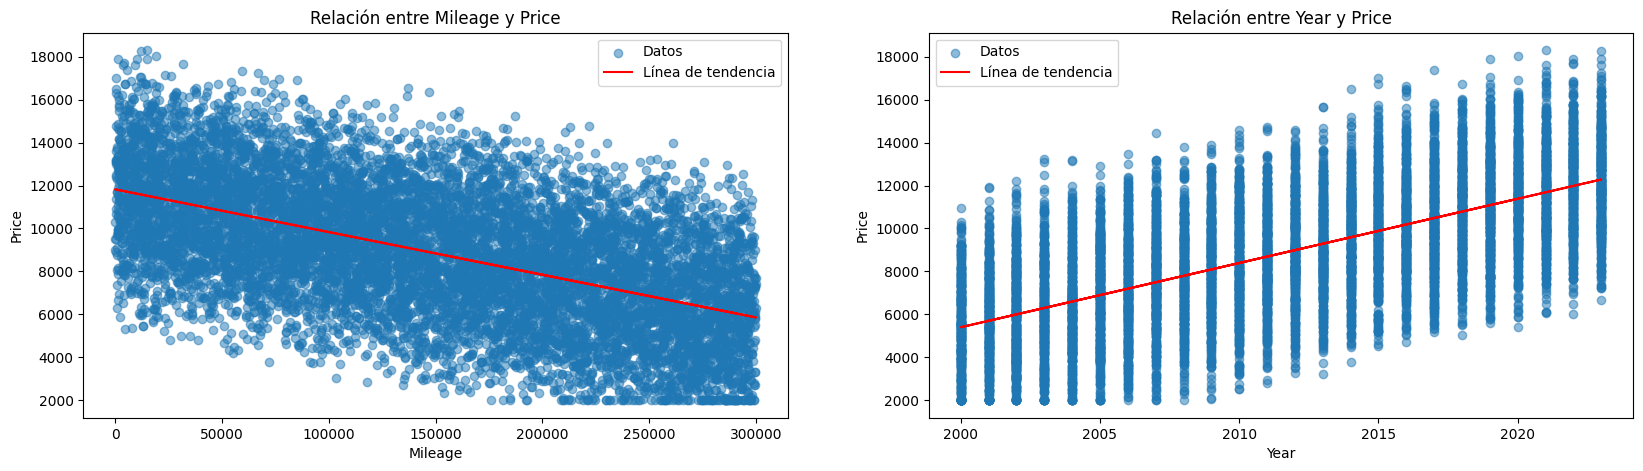

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Seleccionar las características y la variable objetivo
features = ['Mileage', 'Year']
target = df['Price']

# Crear la figura con dos subgráficos
plt.figure(figsize=(20, 5))

for i, col in enumerate(features):
    plt.subplot(1, len(features), i + 1)
    x = df[col]
    y = target

    # Dibujar los puntos de dispersión
    plt.scatter(x, y, marker='o', alpha=0.5, label="Datos")

    # Ajustar y dibujar la línea de tendencia (regresión lineal)
    coef = np.polyfit(x, y, 1)  # Ajuste de una recta (grado 1)
    poly1d_fn = np.poly1d(coef)  # Función de la recta obtenida
    plt.plot(x, poly1d_fn(x), color="red", label="Línea de tendencia")

    plt.title(f'Relación entre {col} y Price')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.legend()

plt.show()

- En las gráficas anteriores se observa que se tienen lineas de tendencia negativa y positivas para los datos Millage y Year

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definir variables predictoras y objetivo
X = df.drop(columns=["Price"])  # Todas las columnas excepto MEDV
y = df["Price"]  # Variable objetivo

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar métricas de evaluación
metrics = pd.DataFrame({
    "Métrica": ["Error Absoluto Medio (MAE)", "Error Cuadrático Medio (MSE)",
                "Raíz del Error Cuadrático Medio (RMSE)", "Coeficiente de Determinación (R²)"],
    "Valor": [mae, mse, rmse, r2]
})

print("Métricas de Evaluación del Modelo")
print(metrics)

Métricas de Evaluación del Modelo
                                  Métrica          Valor
0              Error Absoluto Medio (MAE)     824.478745
1            Error Cuadrático Medio (MSE)  866700.544077
2  Raíz del Error Cuadrático Medio (RMSE)     930.967531
3       Coeficiente de Determinación (R²)       0.905668


- **Error Absoluto Medio (MAE) = 824.48**
Representa aproximadamente el 9.3% del precio promedio (824.48 / 8,853).
No es un error muy alto en comparación con los valores del dataset.
- **Raíz del Error Cuadrático Medio (RMSE) = 930.97**
También está cerca del 10% del precio promedio.
Esto significa que, en la mayoría de los casos, el modelo se equivoca por menos de 1,000 unidades.
- **Coeficiente de Determinación (R²) = 0.9057**
Un valor excelente, indicando que el modelo explica el 90.57% de la variabilidad en los precios.


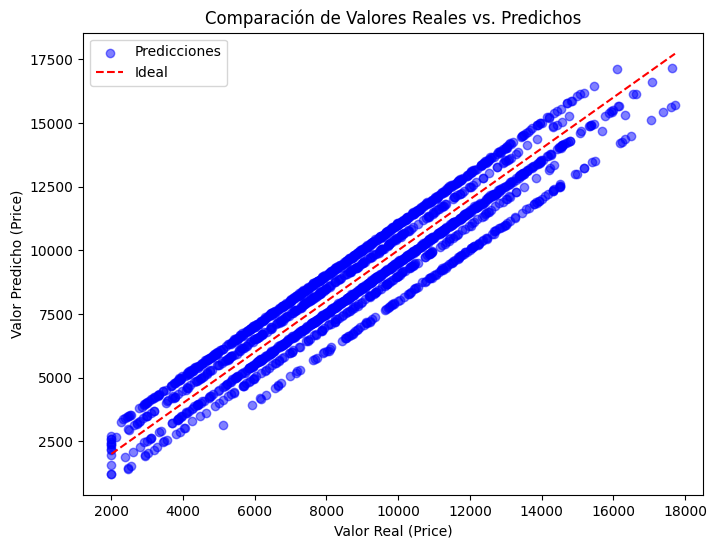

In [22]:
# Crear la figura
plt.figure(figsize=(8, 6))
# Graficar los valores reales vs. predichos
plt.scatter(y_test, y_pred, alpha=0.5, color="blue", label="Predicciones")
# Graficar la línea ideal (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label="Ideal")
# Etiquetas y título
plt.xlabel("Valor Real (Price)")
plt.ylabel("Valor Predicho (Price)")
plt.title("Comparación de Valores Reales vs. Predichos")
plt.legend()
# Mostrar la gráfica
plt.show()

- Los valores predichos siguen la misma dirección que la línea roja (valores reales), significa que el modelo captura bien la tendencia.
- Es una buena señal que los puntos están cerca de la línea roja, aunque no caigan exactamente sobre ella.
- La distribución equilibrada de puntos arriba y abajo de la línea indica que el modelo no tiene un sesgo claro.